In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx 

In [55]:
plt.style.use('ggplot')
entry = '/content/gdrive/MyDrive/hw2_data/'

In [73]:
def construct_graph(edges):
    graph = nx.Graph()
    graph.add_edges_from(edges)
    return graph

## Load Data

In [56]:
train_df_1 = pd.read_csv(f'{entry}/dataset1/train.csv')
train_df_2 = pd.read_csv(f'{entry}/dataset2/train.csv')
train_df_3 = pd.read_csv(f'{entry}/dataset3/train.csv')

## Dataset1

In [57]:
train_df_1.shape

(8686, 4)

In [58]:
train_df_1.head()

,id,to,from,label
0,E10311,2399,2339,0
1,E10255,2397,1144,1
2,E10667,854,1726,0
3,E9395,872,702,0
4,E5926,2450,1312,1


In [59]:
print(f"There are {train_df_1[train_df_1['label']==1]['id'].count()} positive edges in training graph.")
print(f"There are {train_df_1[train_df_1['label']==0]['id'].count()} negative edges in training graph.")


There are 4324 positive edges in training graph.
There are 4362 negative edges in training graph.


In [60]:
with open(f"{entry}/dataset1/content.csv", 'r') as f:
    lines = f.readlines()
    attributes = [ [] for _ in range(len(lines)) ]
    for line in lines:
        line = line.split()
        line = list( map(int, line) )
        attributes[line[0]].extend(line[1:])

attributes = np.array(attributes)
print(f"There are {attributes.shape[0]} nodes")
print(f"There are {attributes.shape[1]} attributes per node")

There are 2708 nodes
There are 1433 attributes per node


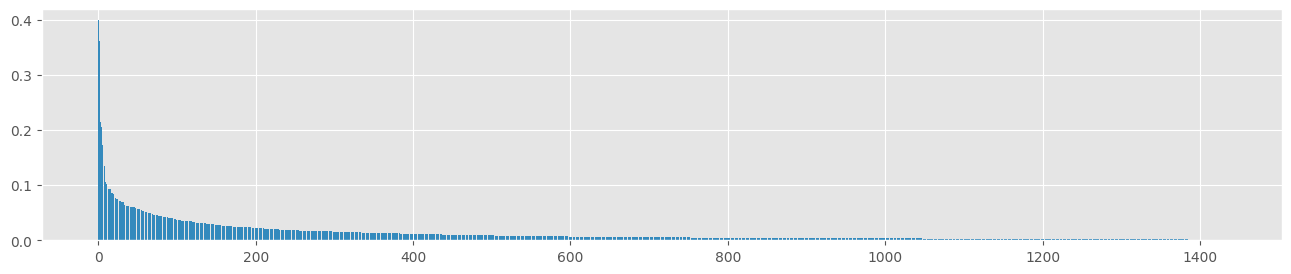

In [61]:
plt.figure(figsize=(16, 3))
plt.bar(range(attributes.shape[1]), sorted(np.mean(attributes, axis=0), reverse=True), color="#348ABD")
plt.show()

Average Degree: 3.271


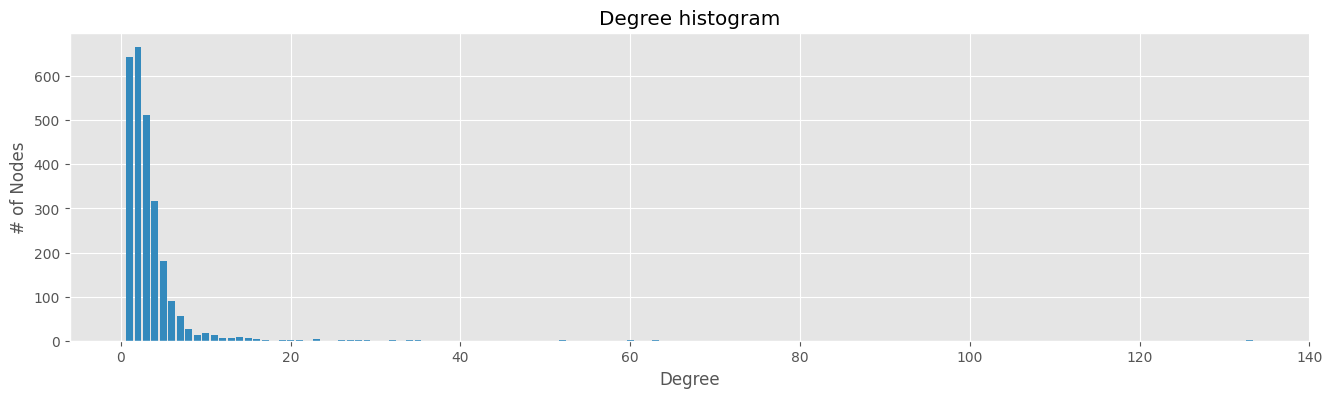

In [86]:
edges = ( train_df_1[train_df_1['label']==1][['to', 'from']].apply(tuple, axis=1) ).tolist()
graph1 = construct_graph(edges)
degrees = sorted((d for n, d in graph1.degree()), reverse=True)
print(f"Average Degree: {np.mean(degrees):.3f}")
plt.figure(figsize=(16, 4))
plt.bar(*np.unique(degrees, return_counts=True), color="#348ABD")
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

## Dataset2

In [62]:
train_df_2.shape

(7544, 4)

In [63]:
train_df_2.head()

,id,to,from,label
0,E5138,1747,3160,1
1,E2648,737,2843,0
2,E7373,55,1883,0
3,E4502,2879,2138,1
4,E4167,671,432,0


In [64]:
print(f"There are {train_df_2[train_df_2['label']==1]['id'].count()} positive edges in training graph.")
print(f"There are {train_df_2[train_df_2['label']==0]['id'].count()} negative edges in training graph.")

There are 3736 positive edges in training graph.
There are 3808 negative edges in training graph.


In [65]:
with open(f"{entry}/dataset2/content.csv", 'r') as f:
    lines = f.readlines()
    attributes = [ [] for _ in range(len(lines)) ]
    for line in lines:
        line = line.split()
        line = list( map(int, line) )
        attributes[line[0]].extend(line[1:])

attributes = np.array(attributes)
print(f"There are {attributes.shape[0]} nodes")
print(f"There are {attributes.shape[1]} attributes per node")

There are 3312 nodes
There are 3703 attributes per node


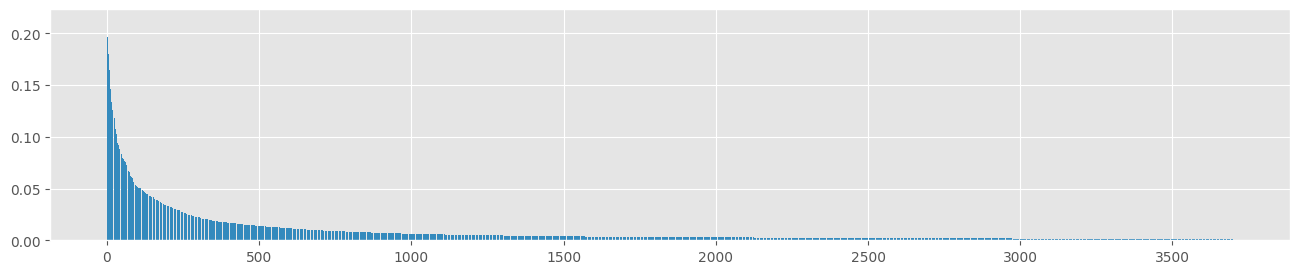

In [66]:
plt.figure(figsize=(16, 3))
plt.bar(range(attributes.shape[1]), sorted(np.mean(attributes, axis=0), reverse=True), color="#348ABD")
plt.show()

Average Degree: 2.473


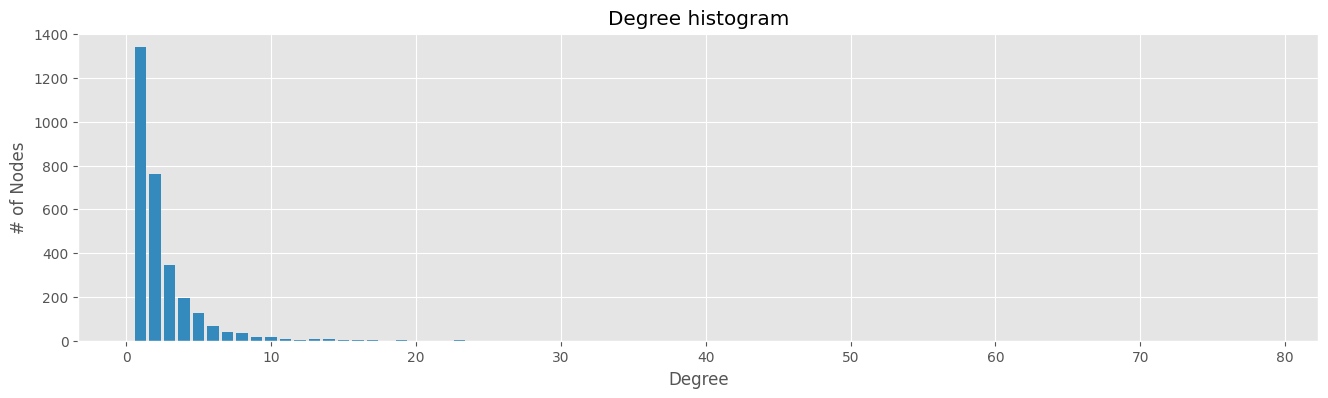

In [85]:
edges = ( train_df_2[train_df_2['label']==1][['to', 'from']].apply(tuple, axis=1) ).tolist()
graph2 = construct_graph(edges)
degrees = sorted((d for n, d in graph2.degree()), reverse=True)
print(f"Average Degree: {np.mean(degrees):.3f}")
plt.figure(figsize=(16, 4))
plt.bar(*np.unique(degrees, return_counts=True), color="#348ABD")
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

## Dataset3

In [67]:
train_df_3.shape

(2572, 4)

In [68]:
train_df_3.head()

,id,to,from,label
0,E2143,612,59,1
1,E1615,843,189,1
2,E2103,677,416,1
3,E3131,797,506,0
4,E1257,175,856,0


In [69]:
print(f"There are {train_df_3[train_df_3['label']==1]['id'].count()} positive edges in training graph.")
print(f"There are {train_df_3[train_df_3['label']==0]['id'].count()} negative edges in training graph.")

There are 1273 positive edges in training graph.
There are 1299 negative edges in training graph.


In [70]:
with open(f"{entry}/dataset3/content.csv", 'r') as f:
    lines = f.readlines()
    attributes = [ [] for _ in range(len(lines)) ]
    for line in lines:
        line = line.split()
        line = list( map(int, line) )
        attributes[line[0]].extend(line[1:])

attributes = np.array(attributes)
print(f"There are {attributes.shape[0]} nodes")
print(f"There are {attributes.shape[1]} attributes per node")

There are 877 nodes
There are 1703 attributes per node


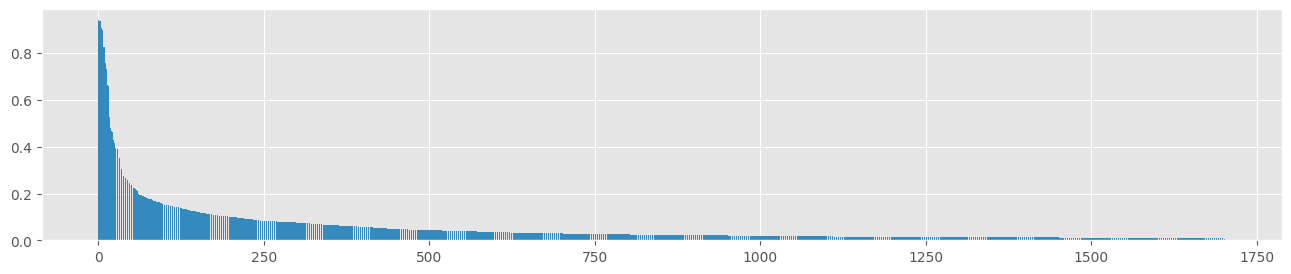

In [71]:
plt.figure(figsize=(16, 3))
plt.bar(range(attributes.shape[1]), sorted(np.mean(attributes, axis=0), reverse=True), color="#348ABD")
plt.show()

Average Degree: 2.920


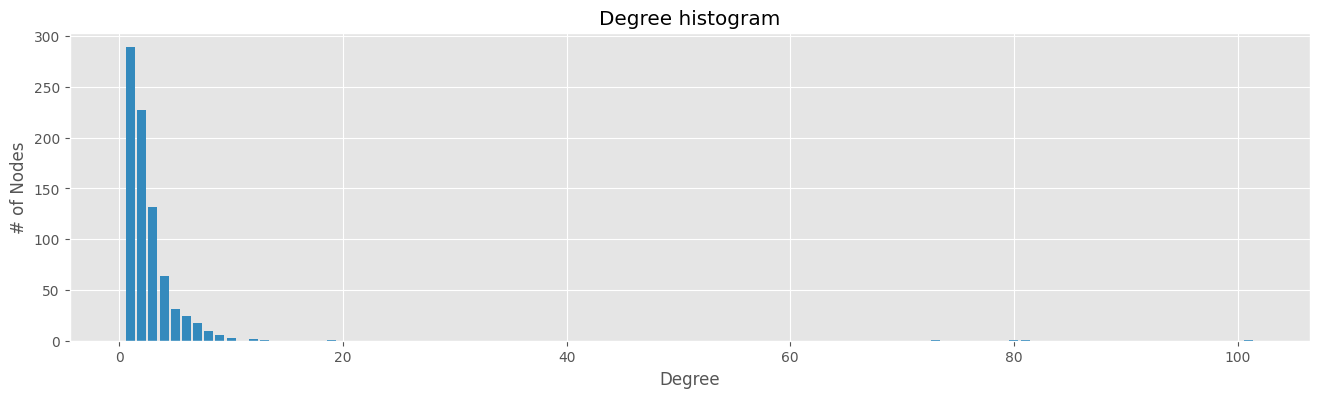

In [84]:
edges = ( train_df_3[train_df_3['label']==1][['to', 'from']].apply(tuple, axis=1) ).tolist()
graph3 = construct_graph(edges)
degrees = sorted((d for n, d in graph3.degree()), reverse=True)
print(f"Average Degree: {np.mean(degrees):.3f}")
plt.figure(figsize=(16, 4))
plt.bar(*np.unique(degrees, return_counts=True), color="#348ABD")
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

## Conclusion among graphs

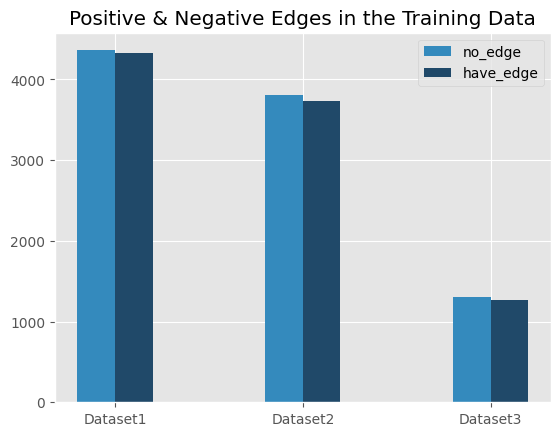

In [50]:
x = np.arange(3)
width=.2
h1 = [
    train_df_1[train_df_1['label']==0]['id'].count(), 
    train_df_2[train_df_2['label']==0]['id'].count(), 
    train_df_3[train_df_3['label']==0]['id'].count()
]         
h2 = [
    train_df_1[train_df_1['label']==1]['id'].count(), 
    train_df_2[train_df_2['label']==1]['id'].count(), 
    train_df_3[train_df_3['label']==1]['id'].count()
]
plt.title("Positive & Negative Edges in the Training Data")
plt.bar(x-width/2,h1,color='#348ABD',width=width, label="no_edge")
plt.bar(x+width/2,h2,color='#204969',width=width, label="have_edge")  
plt.legend()           
plt.xticks([0, 1, 2], ['Dataset1', "Dataset2", "Dataset3"])
plt.show()